In [1]:
import numpy as np
import nibabel as nib
from nilearn import image, plotting, regions

In [2]:
%matplotlib inline

#### Convert the 3D parcellation into a 4D set of ROIs and get the center of mass for each one.

In [4]:
bna_path = '/home/despoB/dlurie/Data/reference/Brainnetome/BNA-maxprob-thr25-1mm.nii.gz'

In [5]:
bna_img = nib.load(bna_path)

In [6]:
bna_labels = range(1,247)

In [7]:
img_stack = []
bna_data = bna_img.get_data()
for idx in bna_labels:
    roi_img = bna_data == idx
    img_stack.append(roi_img)
img_stack = np.array(img_stack)

In [9]:
img_list = []
for idx in range(len(bna_labels)):
    roi_img = image.new_img_like(bna_img, img_stack[idx])
    img_list.append(roi_img)

In [10]:
bna_4D = image.concat_imgs(img_list)

In [11]:
coord_list = []
for roi_img in img_list:
    coord_list.append(plotting.find_xyz_cut_coords(roi_img))
coord_list = np.array(coord_list)

In [12]:
np.save('/home/despoB/DistractWM/data/meta/bna_coords.txt', coord_list)

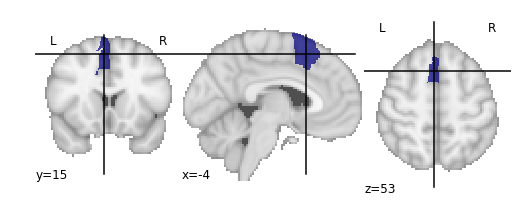

In [13]:
plotting.plot_roi(image.index_img(bna_4D, 0))

In [14]:
bna_4D.to_filename('/home/despoB/DistractWM/data/meta/bna_4D.nii.gz')

In [15]:
bna_include_rois = np.loadtxt('/home/despoB/DistractWM/data/derivatives/group_level_analyses/custom/meta/common-ROIs_exclude-skips__brainnetome.txt', dtype='int')

In [16]:
include_index = np.in1d(bna_labels, bna_include_rois)

In [18]:
include_index.shape

(246,)

In [19]:
coord_list = coord_list[include_index]

In [20]:
coord_list.shape

(221, 3)

In [21]:
import seaborn as sns
sns.set(style='white')

In [22]:
import matplotlib.pyplot as plt

In [28]:
def prepare_communities_NCT(membership_list):
    n_communities = len(np.unique(membership_list))
    color_pallette = sns.color_palette("muted", n_communities).as_hex()
    module_colors = np.empty(221, dtype='object')
    for mod_id in range(1, n_communities+1):
        module_colors[membership_list == mod_id] = color_pallette[mod_id-1]
    return module_colors, color_pallette

In [34]:
def plot_connectograph(corr_mat, module_colors):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    ms = ax1.matshow(corr_mat, interpolation="nearest",
               vmax=1, vmin=-1, cmap='RdBu_r')
    plt.colorbar(ms, ax=ax1)
    plotting.plot_connectome(corr_mat, coord_list, node_size=50, edge_cmap='RdBu_r',
                             node_color=list(module_colors), edge_threshold='99.8%', axes=ax2)

In [25]:
import warnings
warnings.filterwarnings("ignore")

# Condition 1: Low Interference, Easy Search

In [26]:
node_memberships_c1 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_GraphPartition.txt')

In [29]:
colors_c1, pallette_c1 = prepare_communities_NCT(node_memberships_c1)

In [30]:
reordered_mat_c1 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_ReorderedMatrix.txt').reshape(221,221)

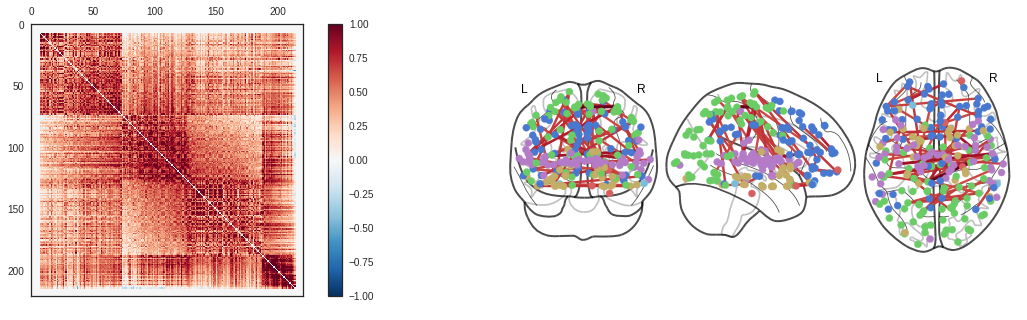

In [35]:
plot_connectograph(reordered_mat_c1, colors_c1)

In [36]:
pc_c1 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_PC.txt')

In [38]:
wmdz_c1 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_WMDz.txt')

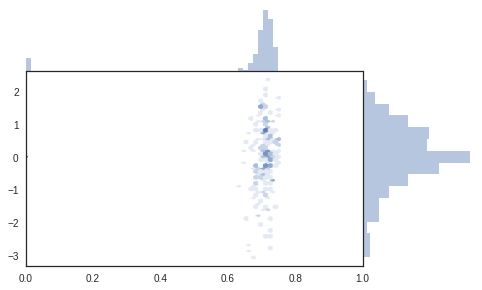

In [44]:
grid = sns.jointplot(pc_c1, wmdz_c1, space=0, stat_func=None, xlim=(0,1), kind='hex', ratio=3)
grid.fig.set_figwidth(7)
grid.fig.set_figheight(4)

# Condition 2: Low Interference, Hard Search

In [45]:
node_memberships_c2 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_GraphPartition.txt')

In [46]:
colors_c2, pallette_c2 = prepare_communities_NCT(node_memberships_c2)

In [47]:
reordered_mat_c2 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_ReorderedMatrix.txt').reshape(221,221)

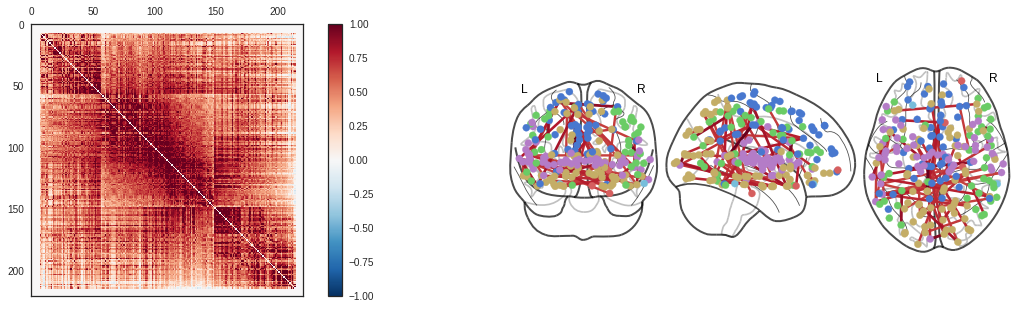

In [48]:
plot_connectograph(reordered_mat_c2, colors_c2)

In [49]:
pc_c2 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_PC.txt')

In [50]:
wmdz_c2 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_WMDz.txt')

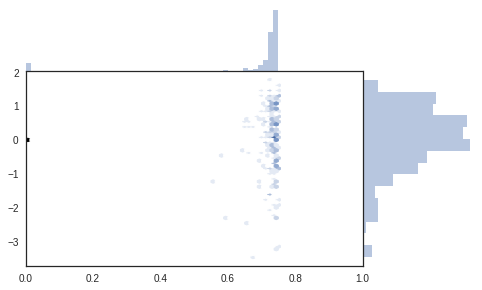

In [51]:
grid = sns.jointplot(pc_c2, wmdz_c2, space=0, stat_func=None, xlim=(0,1), kind='hex', ratio=3)
grid.fig.set_figwidth(7)
grid.fig.set_figheight(4)

# Condition 3: High Interference, Easy Search

In [52]:
node_memberships_c3 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_GraphPartition.txt')

In [53]:
colors_c3, pallette_c3 = prepare_communities_NCT(node_memberships_c3)

In [54]:
reordered_mat_c3 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_ReorderedMatrix.txt').reshape(221,221)

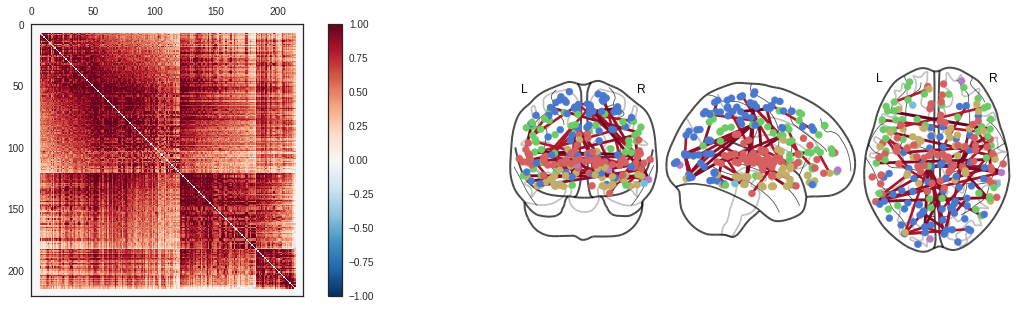

In [55]:
plot_connectograph(reordered_mat_c3, colors_c3)

In [56]:
pc_c3 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_PC.txt')

In [57]:
wmdz_c3 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_WMDz.txt')

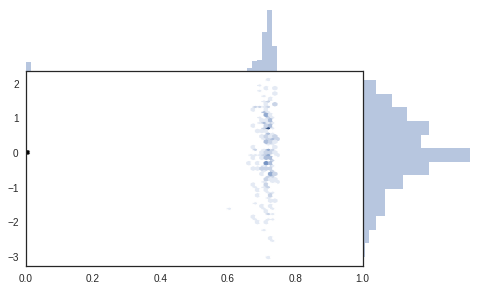

In [58]:
grid = sns.jointplot(pc_c3, wmdz_c3, space=0, stat_func=None, xlim=(0,1), kind='hex', ratio=3)
grid.fig.set_figwidth(7)
grid.fig.set_figheight(4)

# Condition 4: High Interference, Hard Search

In [59]:
node_memberships_c4 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_GraphPartition.txt')

In [60]:
colors_c4, pallette_c4 = prepare_communities_NCT(node_memberships_c4)

In [61]:
reordered_mat_c4 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_ReorderedMatrix.txt').reshape(221,221)

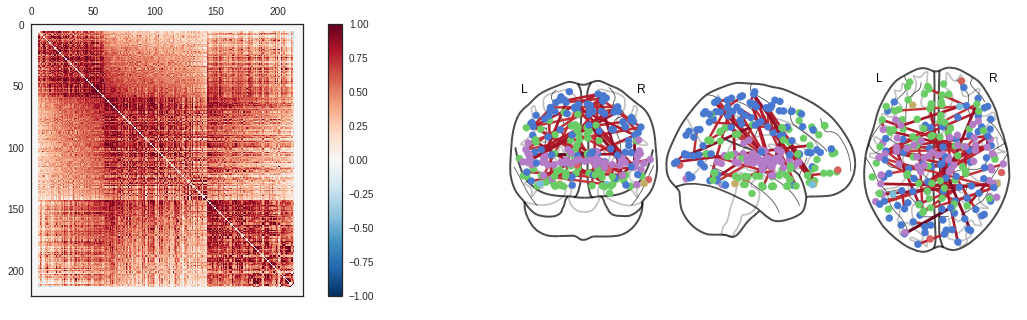

In [62]:
plot_connectograph(reordered_mat_c4, colors_c4)

In [63]:
pc_c4 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_PC.txt')

In [64]:
wmdz_c4 = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_WMDz.txt')

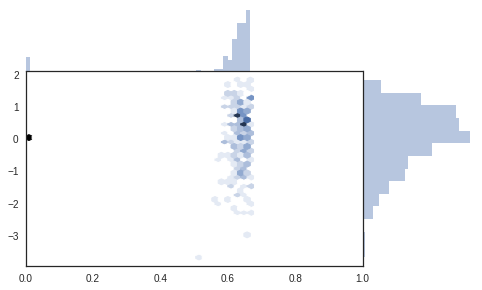

In [65]:
grid = sns.jointplot(pc_c4, wmdz_c4, space=0, stat_func=None, xlim=(0,1), kind='hex', ratio=3)
grid.fig.set_figwidth(7)
grid.fig.set_figheight(4)

# Change across conditions

In [68]:
c1_q = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond1_space-MNI152Lin2009Asym_atlas-BNA_ModularityQ.txt')
c2_q = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond2_space-MNI152Lin2009Asym_atlas-BNA_ModularityQ.txt')
c3_q = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond3_space-MNI152Lin2009Asym_atlas-BNA_ModularityQ.txt')
c4_q = np.loadtxt('/home/despoB/DistractWM/data/derivatives/custom/sub-102/func/alg-Louvain_thresh-None_gamma-1.0_graphdata/sub-102_task-DistractWM_contrast-cond4_space-MNI152Lin2009Asym_atlas-BNA_ModularityQ.txt')

In [71]:
mod_array = np.array([c1_q, c2_q, c3_q, c4_q])

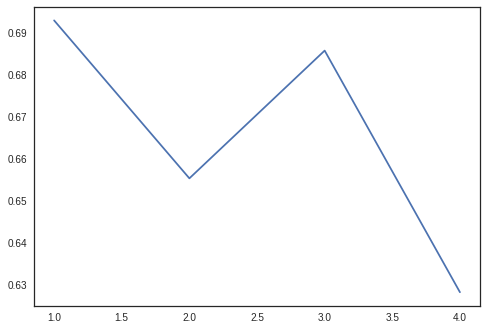

In [73]:
plt.plot(range(1,5), mod_array)